# Programming for Data Analysis Project 2018 #

For this project I decided to chose the gapminder dataset to base my generated dataset upon one of the gapminder datasets.[1] Gapminder is a Swedish foundation that collects, analyses and visualises data about global populations, in order to educate the public about global development.[2]

This gapminder dataset contains 4 numerical variables that collate statistics on population, life expectancy, GDP per capita and year the data was collected, and it also includes 2 catagorical variables that identify the continent and country where the data was collected.[3] The data in this dataset was collected from 1952 to 2007. In the notebook below I investigate the types of variables involved, their likely distributions, and their relationships with each other. I then attempted to synthesise/simulate a data set as closely matching their properties as possible. I specifically was interested in the relationship between the varibles of GDP per capita and a continent's average life expectancy.  

After some online research, mostly on the Gapminder Foundation [website](https://www.gapminder.org/answers/how-does-income-relate-to-life-expectancy/),[4] I found that amongst the highest earning countries, there is no country with a life expectancy below 74, and amongst the lowest earners, there is no country with a life expectancy above 64.

Before investigating the dataset itself, my initial assumptions included the following:
- European and North American populations have the highest life expectancies.  
- Countries in the 'global south' have significantly lower life expectancies, compared to Europe/North America.  
- Countries with a higher GDP per capita would have a higher life expectancies.  
- Countries which have a significant wealth gap between rich and poor classes; ie: US, China, South Africa, Russia, might have a high average life expectancy. When studied in more granular detail this mean might in fact be skewed by outliers (a small percentage of rich people compared to overall population), whereas most of the population could actually have very low life expectancies.  
- Life expectancies would increase over time.  
- Asia would have the largest range of life expectancies, with both extremely high GDP per capita (Japan/Hong Kong) and extremely low GDP per capita (India/Afghanistan).    

Due to time constraints, I decided to investigate just Asian and European subsets of the dataset. After some research in the notebook below, I found that there was a correllation between GDP per capita and life expectancy for most countries, regardless of continent. I also found that there were great differences in the variation of life expectancies in Asian countries, with China and Japan significantly outperforming other Asian countries in this regard. Although Asian countries do show a definitive correlation between GDP per capita and life expectancy, some countries such as China demonstrate increasing life expectancy despite most of it's population having relatively low GDP per capita. We also see a correlation between increasing population and life expectancy in China. European countries are far more consistent in their data patterns, with all countries demonstrating a dramatic increase in life expectancy as GDP per capita increases. Population growth does not have as significant an effect on life expectancy for European countries. All countries demonstrated increasing life expectancies over time. If time was no object, I think it would be interesting to look into the relationship of the life expectancy to GDP per capita year by year. I think that this would yield more accurate results, as then other untracked variables such as increasing rates of economic inflation would not impact the results.

For the purposes of this project, I simulated a dataset for the European dataset using numpy.random.randint [5], as this was one of the few functions I found which allowed a range of values, minimum and maximum, to be passed into it as arguments. I also experimented a little with numpy.random.choice [6], as it appears to allow the user to add weighted probability distributions to various datapoints. However I wasn't able to make it generate anything like what the real dataset looked like. I also attempted to generate a skewed dataset using the numpy.random.pareto [7] and numpy.random.exponential [8] algorithms, with very limited success. 

In [3]:
# Import all libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [4]:
# Read in the gapminder CSV file and store as a pandas dataframe

df = pd.read_csv("https://raw.githubusercontent.com/joanh3aly/GMIT-2-programming-project/master/gapminder.csv")
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [5]:
df.tail()

,country,year,pop,continent,lifeExp,gdpPercap
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298


### Using Matplotlib, I generated a graph comparing the GDP per cap vs the life expectancy of each continent.
We can see that Europe and the Americas have progressively higher life expectancies as GDP increases, particularly when GDP per capita goes above above the 20,000 USD per year mark. Although African countries appear to show a similar trend, there are many countries which have a relatively high GDP per cap, yet life expectancy isn't much greater than 55. Asian countries appear to differ wildly from one another, where extremely high GDPs don't correllate to very high life expectancy. I assume that this is due to the fact that many Asian countries are highly developed, whereas others are still developing.

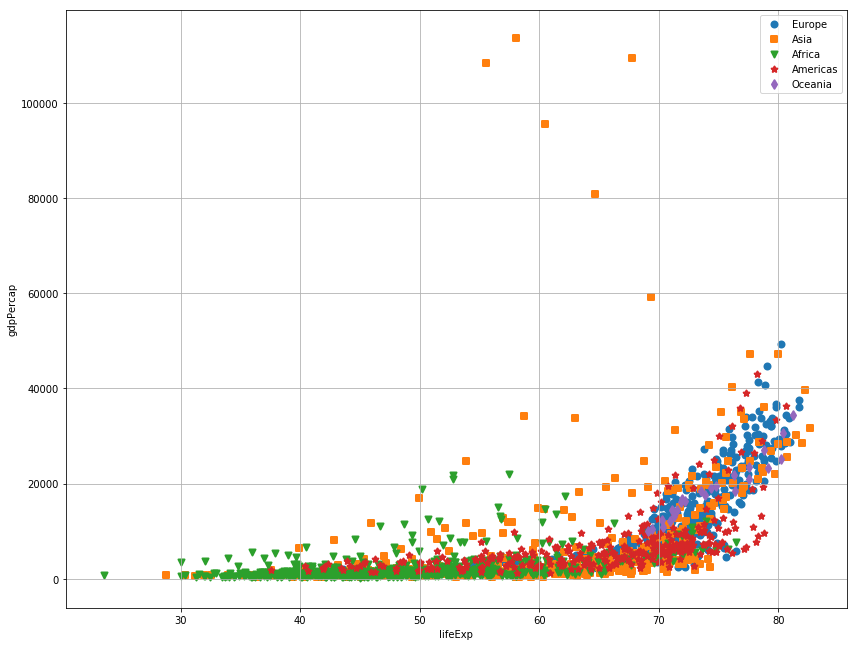

Current size: [14.0, 11.0]


In [10]:
# [9][10][11]
asiaDf = df.loc[df['continent']=='Asia']
europeDf = df.loc[df['continent']=='Europe']
africaDf = df.loc[df['continent']=='Africa']
americasDf = df.loc[df['continent']=='Americas']
oceaniaDf = df.loc[df['continent']=='Oceania']

plt.scatter(europeDf['lifeExp'], europeDf['gdpPercap'], label='Europe', lw=2, marker='o')
plt.scatter(asiaDf['lifeExp'], asiaDf['gdpPercap'], label='Asia', lw=2, marker='s')
plt.scatter(africaDf['lifeExp'], africaDf['gdpPercap'], label='Africa', lw=2, marker='v')
plt.scatter(americasDf['lifeExp'], americasDf['gdpPercap'], label='Americas', lw=2, marker='*')
plt.scatter(oceaniaDf['lifeExp'], oceaniaDf['gdpPercap'], label='Oceania', lw=2, marker='d')

plt.xlabel('lifeExp')
plt.ylabel('gdpPercap')
plt.grid()
plt.legend(loc='upper right')

plt.show()
fig_size = plt.rcParams["figure.figsize"]
print("Current size:", fig_size)
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

### Below we can see the distribution of life expectancies for the entire dataset using Seaborn's histogram function ###  
Most people in this dataset live past 40 years of age, and die before they turn 75.

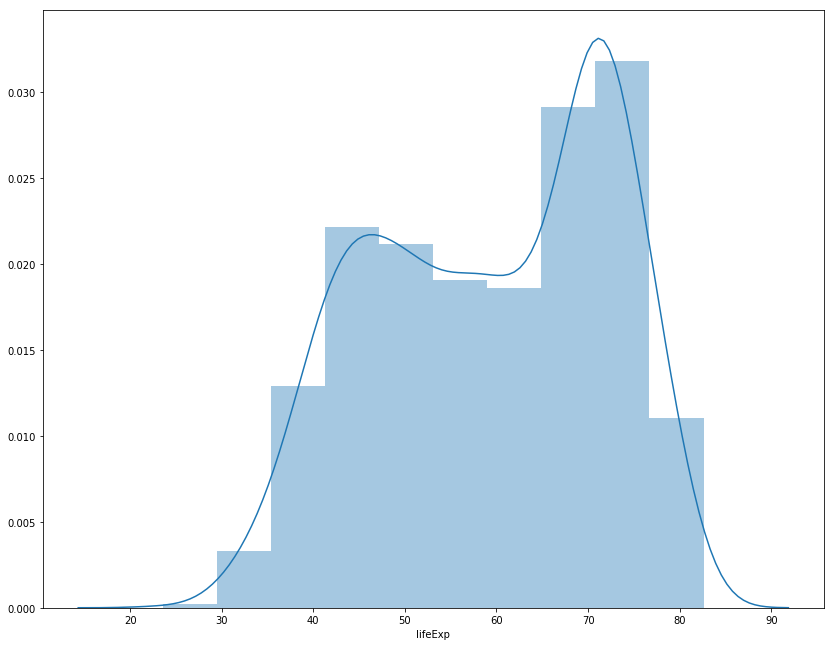

In [7]:
# [12]
sns.distplot(df['lifeExp'],bins=10)

### In the graphs below, we can view a high level overview of the changes in population and life expectancy, broken down by continent. ###

From these graphs we can find some outliers in the samples, with Asia demonstrating the most dramatic change in life expectancy, population growth and GDP per capita over time.

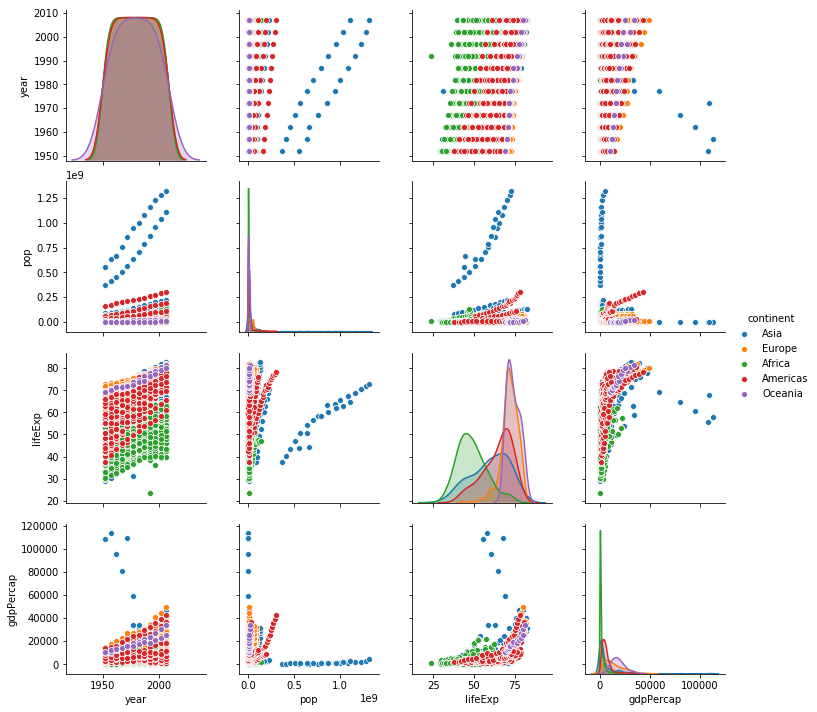

In [11]:
# [13]
sns.pairplot(df, hue="continent")

### Below we see a graph of GDP per capita and life expectancy for only countries in Asia  ###  
Here we can see the outliers more clearly. Where most countries appear to have higher life expectancy as GDP per capita increases, there are about 10 countries which have relatively low life expectancies, despite having some of the highest GDP per capita in the world.

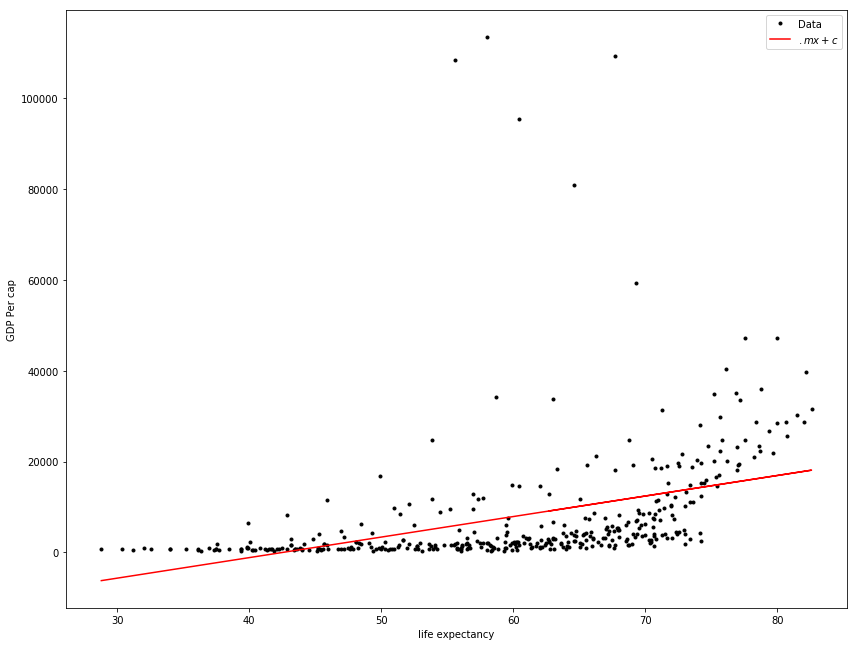

In [12]:
# [14]
slope = np.polyfit(asiaDf['lifeExp'], asiaDf['gdpPercap'], 1)

plt.plot(asiaDf['lifeExp'], asiaDf['gdpPercap'], 'k.', label="Data")

plt.plot(asiaDf['lifeExp'], slope[0] * asiaDf['lifeExp'] + slope[1], 'r-', label=r"$.mx + c$")

plt.legend()

plt.xlabel("life expectancy")
plt.ylabel("GDP Per cap")

plt.show()

### Below we see plots for the 4 numerical variables (population, year, life expectancy and GDP per capita) represented. ###  
For some countries, China and India, it would appear as though population also has a direct correlation with increasing life expectancy. For most countries population increase has a negligable effect on life expectancy.

In [ ]:
sns.pairplot(asiaDf, hue="country")

### Below are the descriptive statistics for the Asian countries ###

In [ ]:
asiaDf.describe()

### Below we can see a skewed distribition of data, where most people live above 55 years of age. ###

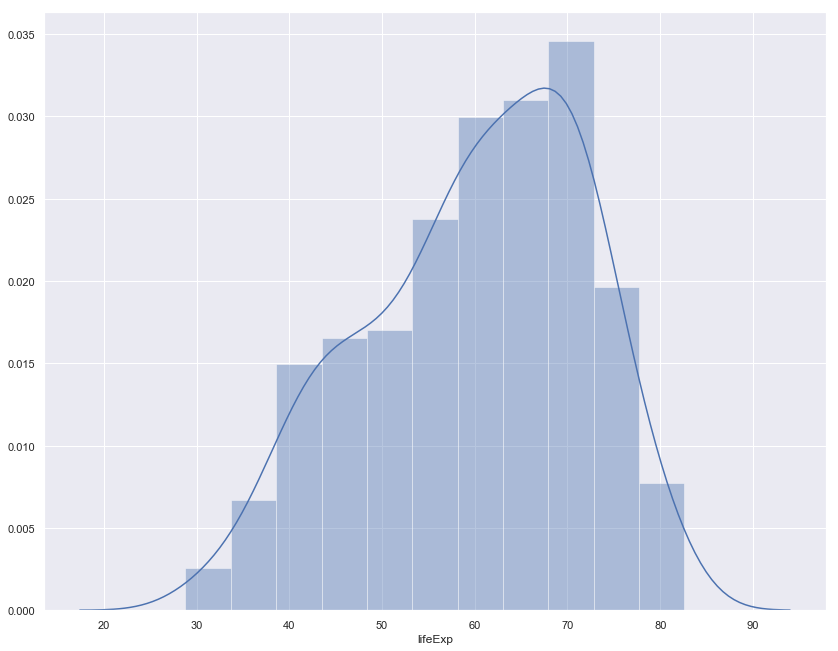

In [18]:
sns.set(color_codes=True)
sns.distplot(asiaDf['lifeExp'])

### Most of the population in Asian countries makes very little money, as seen in the distribition below.  ###  
Unlike what I would have expected to see in most countries, Asians on average earn very low wages, yet have relatively high life expectancies. One would need to do more granular analysis of the data comparing each country to understand why this is the case. It could be a case Simpson's Paradox, where if you look in to the dataset in more detail, you find that the statistics that describe the entire Asian dataset do not apply to each individual country, where great differences between each country exist.

In [ ]:
sns.distplot(asiaDf['gdpPercap'])

### I decided to look into the Asian data further and found that there were huge differences between countries. ###

In [16]:
chinaDf = df.loc[df['country']=='China']
print(chinaDf)

    country  year           pop continent   lifeExp    gdpPercap
288   China  1952  5.562635e+08      Asia  44.00000   400.448611
289   China  1957  6.374080e+08      Asia  50.54896   575.987001
290   China  1962  6.657700e+08      Asia  44.50136   487.674018
291   China  1967  7.545500e+08      Asia  58.38112   612.705693
292   China  1972  8.620300e+08      Asia  63.11888   676.900092
293   China  1977  9.434550e+08      Asia  63.96736   741.237470
294   China  1982  1.000281e+09      Asia  65.52500   962.421380
295   China  1987  1.084035e+09      Asia  67.27400  1378.904018
296   China  1992  1.164970e+09      Asia  68.69000  1655.784158
297   China  1997  1.230075e+09      Asia  70.42600  2289.234136
298   China  2002  1.280400e+09      Asia  72.02800  3119.280896
299   China  2007  1.318683e+09      Asia  72.96100  4959.114854


### Below we can see the differences between China and Afghanistan, two of the more extreme outliers in the Asian dataset. ###

288     400.448611
289     575.987001
290     487.674018
291     612.705693
292     676.900092
293     741.237470
294     962.421380
295    1378.904018
296    1655.784158
297    2289.234136
298    3119.280896
299    4959.114854
Name: gdpPercap, dtype: float64


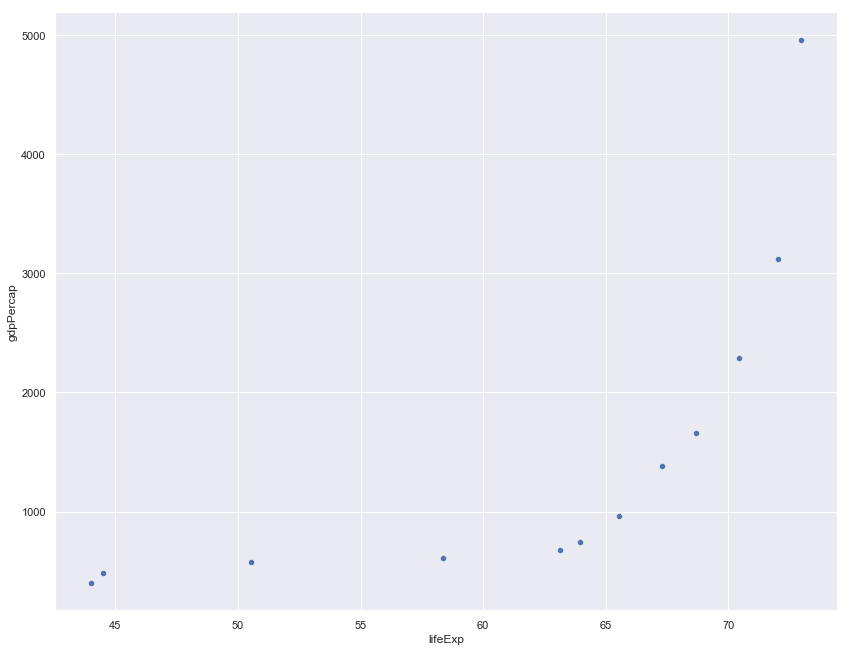

In [19]:
# [15]
print(chinaDf['gdpPercap'])
chinaDf.plot.scatter(x='lifeExp',y='gdpPercap')

### Life expectancy in China steadily increases over time, with a sharper increase after 1970. ###

In [ ]:
chinaDf.plot.scatter(x='lifeExp',y='year')

### It would appear from the distributions below, that wages are still low for most people, yet life expectancy is relatively high for most of the population: >60 years. ###

In [ ]:
sns.distplot(chinaDf['gdpPercap'],bins=10)

In [ ]:
sns.distplot(chinaDf['lifeExp'],bins=10)

### Afghanistan has some of the lowest life expectancies in Asian and the world. ###
Presumably due to several decades of war and resultant food shortages/lack of infrastructure/economic growth, the average life expectancy of Afghans (37) is roughly 30% lower than that of Chinese people (61).

In [ ]:
afghanistanDf = df.loc[df['country']=='Afghanistan']
afghanistanDf.describe()

In [ ]:
chinaDf.describe()

### We can see from the 4 graphs below, that even though life expectancy has been increasing over time, that there doesn't appear to be a correlation between life expectancy and GDP per capita.  ###

In [ ]:
afghanistanDf.plot.scatter(x='lifeExp',y='gdpPercap')

In [ ]:
afghanistanDf.plot.scatter(x='lifeExp',y='year')

### Most people earn very little money (800 usd), and live very short lives (40-45). ###

In [ ]:
sns.distplot(afghanistanDf['gdpPercap'],bins=5)

In [ ]:
sns.distplot(afghanistanDf['lifeExp'], bins=10)

In [ ]:
genAsiaLifeexpDf = np.random.choice(5, 100, p=[0.1, 0, 0.3, 0.6, 0])
print(genAsiaLifeexpDf)
genDf[genAsiaLife]

### The graph below displays the GDP per capita vs life expectancy of Europeans. ##   
We can see that life expectancy remains relatively low (below 70) where GDP is below 10,000 per year, and then increases dramatically when GDP per capita increases. I'm actually surprised that the life expectancy is so high at 10,000 GDP but maybe these societies are more egalitarian, or perhaps the data is being skewed by data from the mid 20th century if monetary inflation isn't taken into account when the dataset was compiled.

In [ ]:
slope = np.polyfit(europeDf['lifeExp'], europeDf['gdpPercap'], 1)

plt.plot(europeDf['lifeExp'], europeDf['gdpPercap'], 'k.', label="Data")

plt.plot(europeDf['lifeExp'], slope[0] * europeDf['lifeExp'] + slope[1], 'r-', label=r"$.mx + c$")

plt.legend()

plt.xlabel("life expectancy")
plt.ylabel("GDP Per cap")

plt.show()

### From the pairplot below, we can see that life expectancy increases in line with GDP per capita for almost all countries. ###   
Life expectancy doesn't increase with population growth for most countries, but there are a half dozen where it does increase with population growth.
Life expectancy increases over time for all countries, with Turkey showing the most dramatic increase over time.

In [ ]:
sns.pairplot(europeDf, hue="country")

### Both the average life expectancies (71) and GDP per capita (~15000 USD) of European countries is significantly higher than that of Asian countries. ###
This could be due to economic advantages such as favourable trade agreements, the EU, and higher availability of social welfare and cheap/government subsidised healthcare.

In [ ]:
europeDf.describe()

In [ ]:
asiaDf.describe()

### When the European dataframe is sorted by year, we can see life expectancy increasing steadily over time. ###

In [ ]:
europeDf.sort_values(['year'])

### Below we can see the distribution of the data, where most Europeans are fortunate enough to live to 70 and above. ###

In [ ]:
sns.set(color_codes=True)
sns.distplot(europeDf['lifeExp'])

In [ ]:
europeDf.shape

### A breakdown of the European dataframe is as so: ###
- Life expectancy values range between 43 to 81 year of age.   
- GDP per capita range between 973 to 49357 usd.  
- Populations range between 147962 to 82400996.  
- Years range between 1952 to 2007.

Based on these figures, we can generate a dataset that attempts to mimic the real gapminder dataset, or subset of European data.


In [ ]:
generatedEuLifeexpDf = np.random.choice(5, 100, p=[0.1, 0, 0.3, 0.6, 0])
print(generatedEuLifeexpDf)

In [ ]:
# generate numpy array of life expectancy
generatedEuLifeexpArr = np.random.randint(43,81, size=(100))
generatedEuLifeexpArr = np.sort(generatedEuLifeexpArr)  
print(generatedEuLifeexpArr)

In [ ]:
# generate numpy array of population
generatedEuPopArr= np.random.randint(147962,82400996, size=(100))
generatedEuPopArr = np.sort(generatedEuPopArr)  
print(generatedEuPopArr)

In [ ]:
# generate numpy array of GDP per capita
generatedEuGdpArr = np.random.randint(973,49357, size=(100))
generatedEuGdpArr = np.sort(generatedEuGdpArr)  
print(generatedEuGdpArr)

In [ ]:
# generate numpy array of year variable
generatedEuYearArr = np.random.randint(1952,2007, size=(100))
generatedEuYearArr = np.sort(generatedEuYearArr)  
print(generatedEuYearArr)

### Below is the code to create the pandas dataframe from the above numpy array variables.###

In [ ]:
generatedEuDf = pd.DataFrame({
        "year": generatedEuYearArr, 
        "lifeExp": generatedEuLifeexpArr, 
        "population": generatedEuPopArr, 
        "GDPpercap":generatedEuGdpArr
    })

In [ ]:
generatedEuDf

### Comparing the real and simulated datasets, we can see that, although similar, they are different in many ways. ###
The simulated dataset has a more normal distribution, whereas the real dataset skews to the left.

In [ ]:
# simulated df distribution
sns.set(color_codes=True)
sns.distplot(generatedEuDf['lifeExp'])

In [ ]:
# real df distribution 
sns.set(color_codes=True)
sns.distplot(europeDf['lifeExp'])

### The slope of both the real and simulated datasets show a linear correlation between life expectancy and GDP per capita. However the dataset is skewed by having more datapoints below 10,000 usd. ###

In [ ]:
slope = np.polyfit(generatedEuDf['lifeExp'], generatedEuDf['GDPpercap'], 1)

plt.plot(generatedEuDf['lifeExp'], generatedEuDf['GDPpercap'], 'k.', label="Data")

plt.plot(generatedEuDf['lifeExp'], slope[0] * generatedEuDf['lifeExp'] + slope[1], 'r-', label=r"$.mx + c$")

plt.legend()

plt.xlabel("life expectancy")
plt.ylabel("GDP Per cap")

plt.show()

In [ ]:
slope = np.polyfit(europeDf['lifeExp'], europeDf['gdpPercap'], 1)

plt.plot(europeDf['lifeExp'], europeDf['gdpPercap'], 'k.', label="Data")

plt.plot(europeDf['lifeExp'], slope[0] * europeDf['lifeExp'] + slope[1], 'r-', label=r"$.mx + c$")

plt.legend()

plt.xlabel("life expectancy")
plt.ylabel("GDP Per cap")

plt.show()

### As we can see from the statistics below, even though the minimum and maximum values of each dataframe are approximately the same, the mean, standard deviation, and other statistics are different. ###

In [ ]:
generatedEuDf.describe()

In [ ]:
europeDf.describe()

### Below is a [failed] attempt to skew some of the simulated data to mimic the real dataset. ###

In [ ]:
a, m = 1, 43  # shape and mode
#s = (np.random.pareto(a, 1000) + 1) * m

#x = np.random.pareto(shape, size) + lower
x = (np.random.pareto(1, 1000) + 43)
#print(s)
y = x.astype(int)
y.sort()
print(y[500:])


In [ ]:
count, bins, _ = plt.hist(y[500:], 100, density=True)
fit = m*a**m / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

In [ ]:
x = np.random.exponential()

In [ ]:
sns.distplot(x, hist=False, rug=True);

## References ##

1. https://www.gapminder.org
2. https://www.gapminder.org/about-gapminder/
3. https://www.gapminder.org/data/
4. https://www.gapminder.org/answers/how-does-income-relate-to-life-expectancy/
5. https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
6. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html
7. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.pareto.html
8. https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.exponential.html#numpy.random.exponential
9. https://stackoverflow.com/questions/48097995/matplotlib-plot-size-how-to-adjust-the-size
10. https://stackoverflow.com/questions/4270301/matplotlib-multiple-datasets-on-the-same-scatter-plot
11. https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/
12. https://seaborn.pydata.org/tutorial/distributions.html
13. https://seaborn.pydata.org/generated/seaborn.pairplot.html
14. https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html
15. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html
16. https://seaborn.pydata.org/generated/seaborn.lineplot.html
17. https://stackoverflow.com/questions/24815074/plotting-multiple-y-values-against-multiple-x-values-which-are-different-timesta
18. https://www.datacamp.com/community/blog/python-pandas-cheat-sheet
19. https://stackoverflow.com/questions/19525899/how-to-generate-random-numbers-in-specyfic-range-using-pareto-distribution-in-py

